In [1]:
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library("RColorBrewer")
library(ggplot2)
library(dplyr)
library(purrr)
library(ggsignif)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell", "Megakaryocyte",
              "Natural killer cell", "CD16+ monocyte", "Dendritic cell", "Plasmacytoid dendritic cell")
coi <- c("Cytotoxic T cell", "Natural killer cell","Dendritic cell", "Plasmacytoid dendritic cell" ) # cell types of interest
methods <- c("Seurat",  "SingleR","CellID", "SingleCellNet", "ItClust")

colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes

In [3]:
runtime <- read.csv("../Results//Files/runtime.txt", sep=" ", header=F)
colnames(runtime) <- c("Method", "Gene", "Tag", "Runtime")

runtime[c('Reference', 'Size', "Set")] <- stringr::str_split_fixed(runtime$Tag, '_', 3)

runtime <- runtime[runtime$Reference =="PBMC10x",]
runtime$Runtime <- as.numeric(runtime$Runtime)
runtime$Size <- as.numeric(runtime$Size)

runtime$Method[runtime$Method=="SCN"] <- "SingleCellNet"
unique(runtime$Method)
runtime$Method <- factor(runtime$Method, levels=methods)
runtime <- runtime[!is.na(runtime$Runtime),]
runtime <- runtime[runtime$Gene == c(1000, "all"),]

unique(runtime$Method)

[1] "Seurat"        "ItClust"       "CellID"        "SingleCellNet"
[5] "SingleR"

[1] ItClust       Seurat        CellID        SingleCellNet SingleR      
Levels: Seurat SingleR CellID SingleCellNet ItClust

`summarise()` has grouped output by 'Size', 'Method'. You can override using the `.groups` argument.


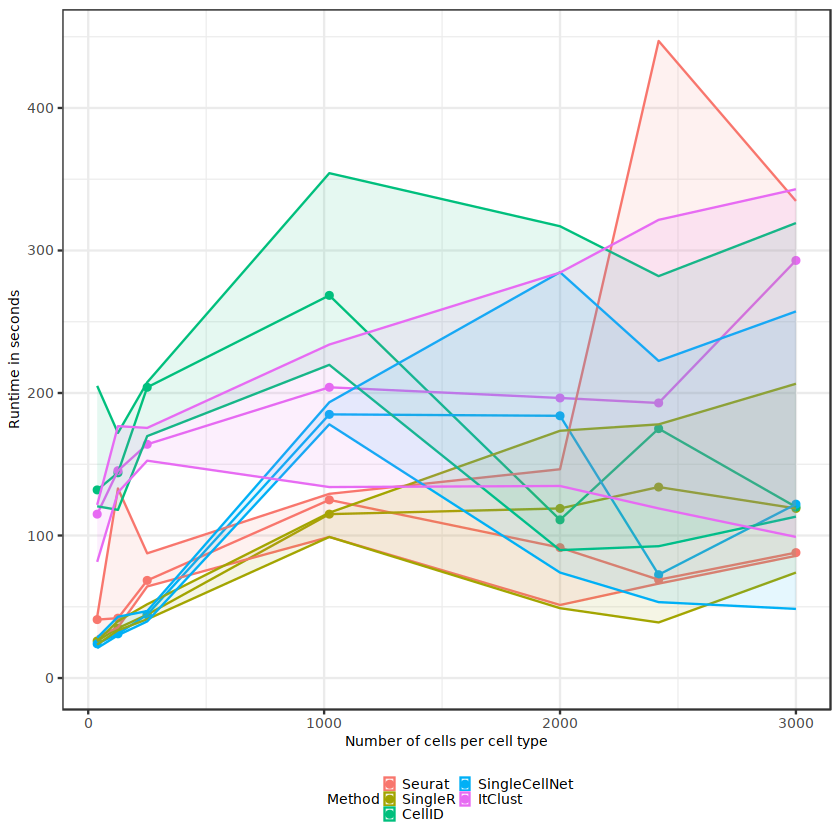

In [4]:
runtime_summary <- runtime[runtime$Size%in% c(38,126,250,603,1022,2000,2418,3000),] %>% 
           dplyr::group_by(Size, Method, Reference) %>% 
           dplyr::summarize(mean = median(Runtime),
                            p25 = quantile(Runtime, probs = c(0.25)),
                            p75 = quantile(Runtime, probs = c(0.75))) 

f6a <- ggplot(runtime_summary, aes(as.numeric(Size), mean,
                                   color=Method, group=Method, fill= Method)) +
        geom_point() + geom_line() + 
        geom_ribbon(aes(ymin = p25, ymax = p75), alpha = 0.1)+ 
        guides(linetype=guide_legend(ncol=2), color=guide_legend(ncol=2))

f6a <- addFormatting(f6a, "Runtime in seconds", "Number of cells per cell type", "bottom", " ",
                     ylim=c(0,max(runtime_summary$p75)))


  
f6a

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“The dot-dot notation (`..p.signif..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(p.signif)` instead.”


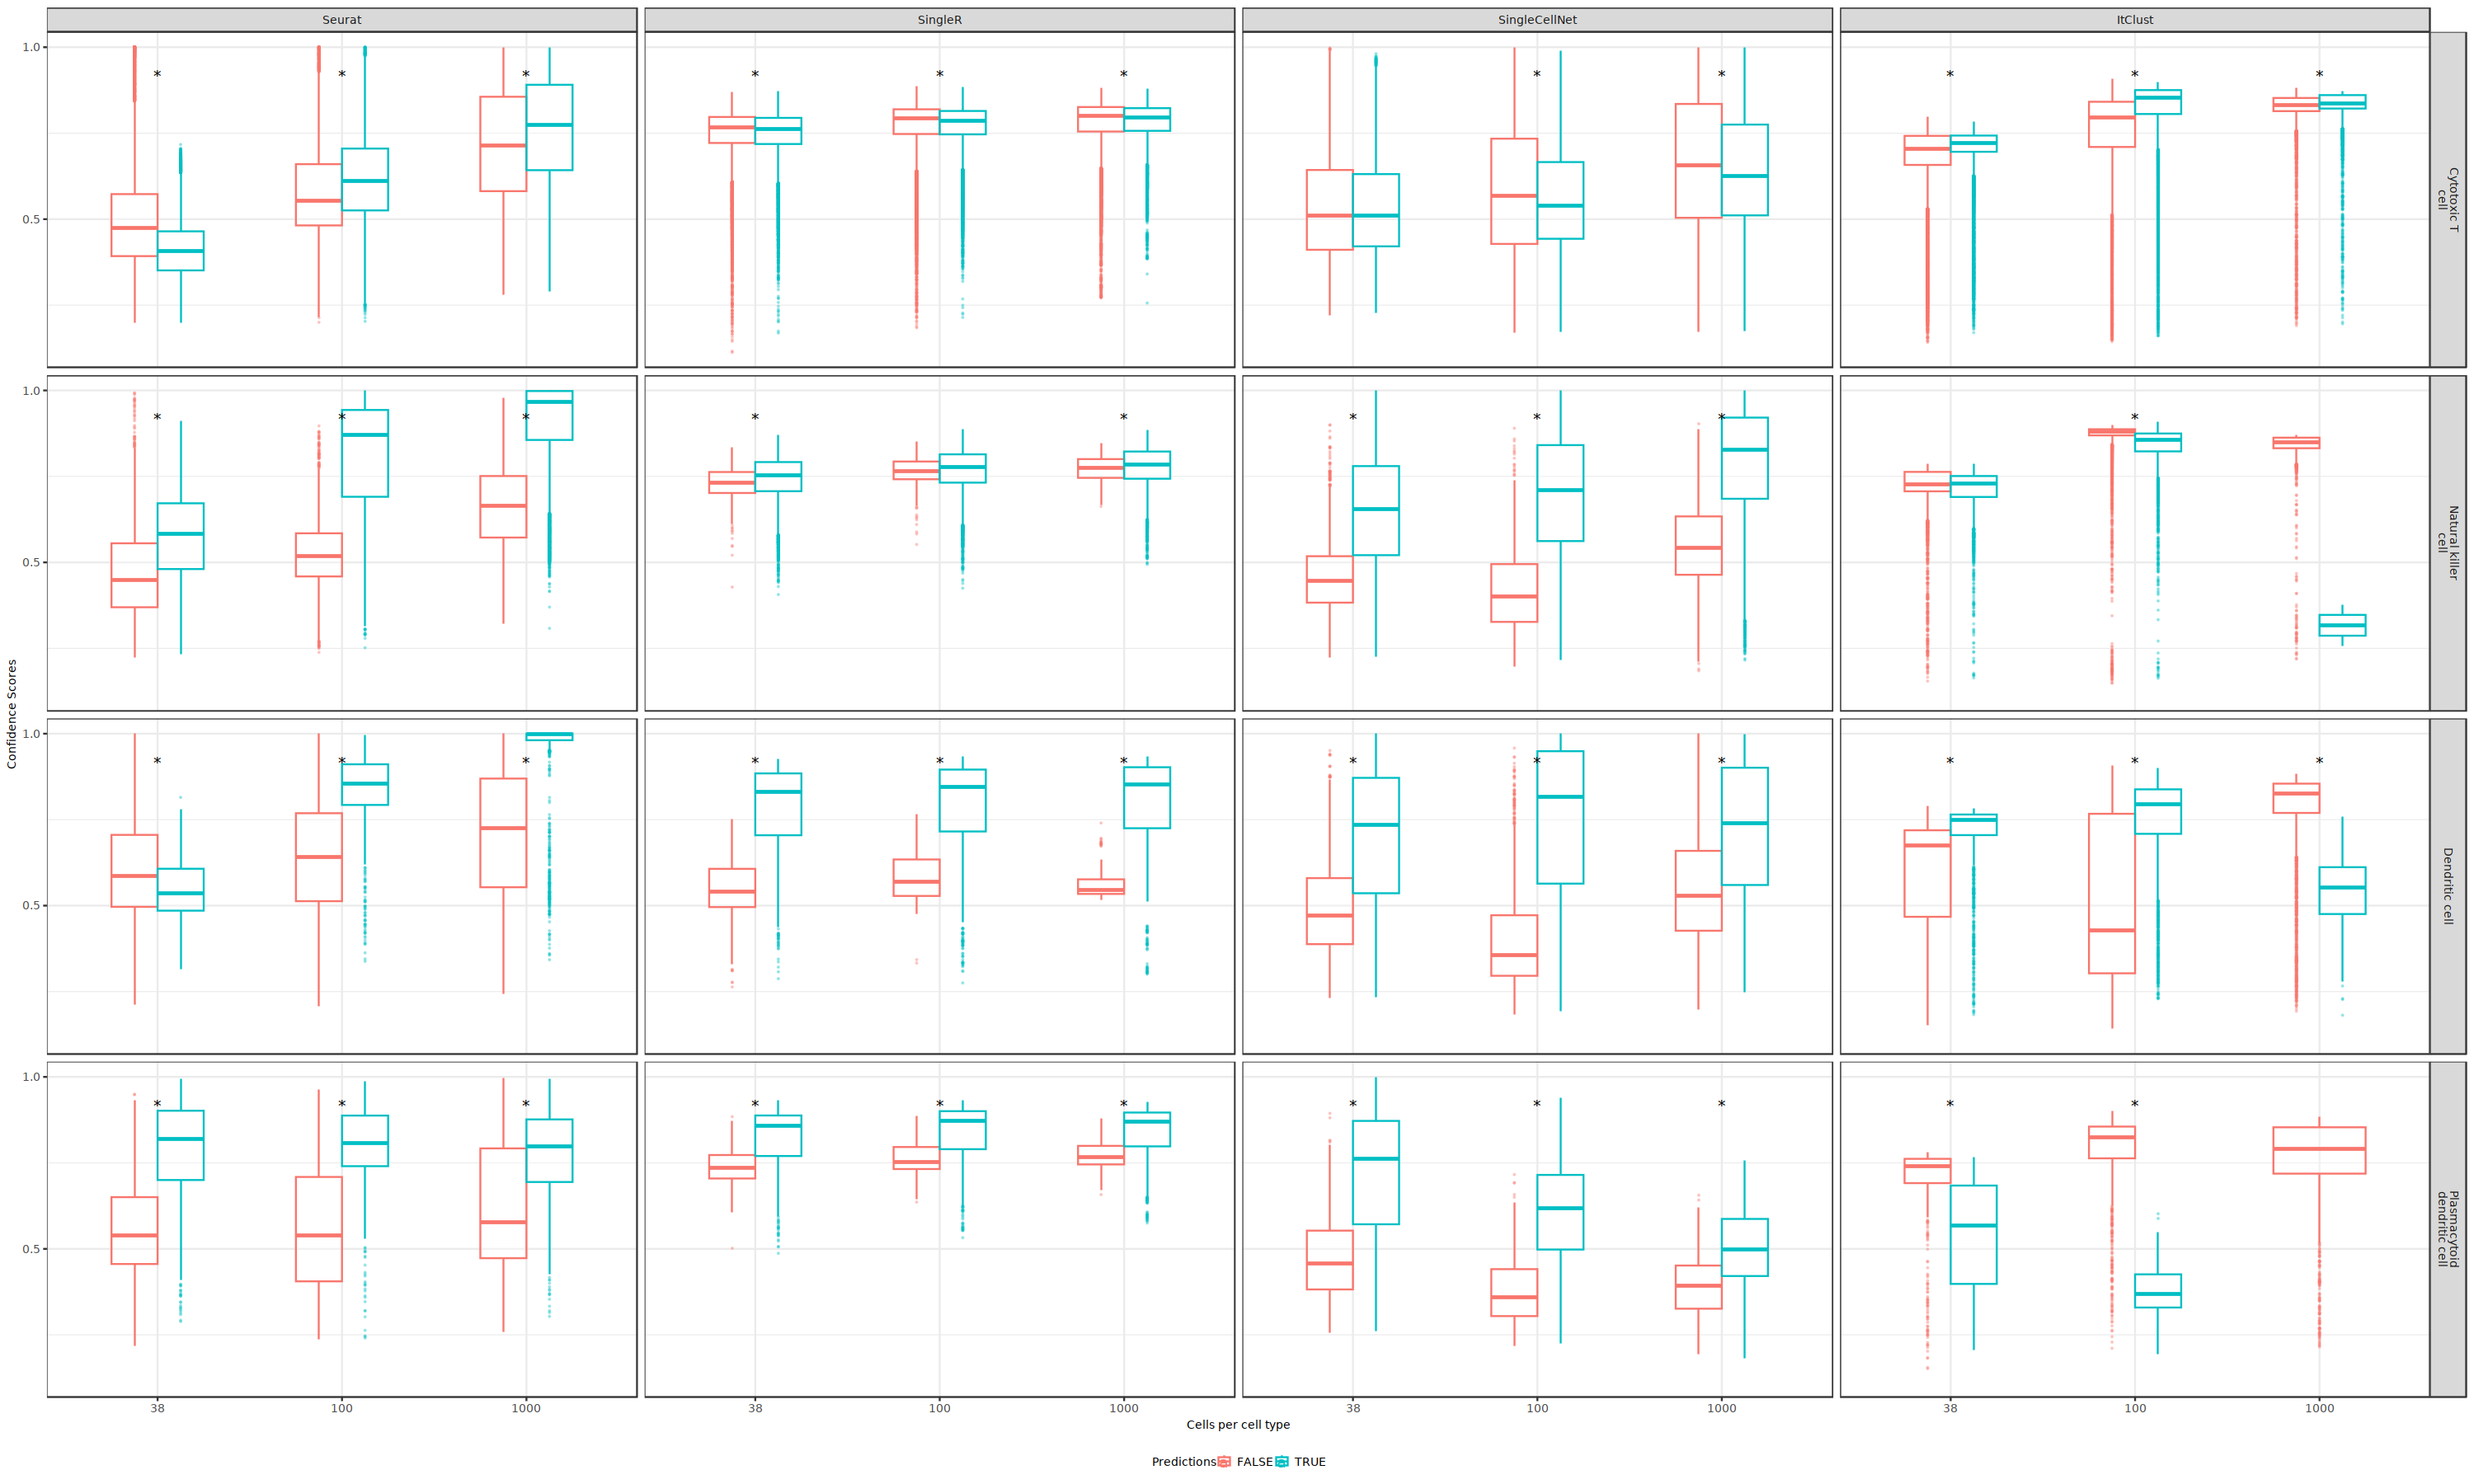

In [5]:
library(ggpubr)
options(repr.plot.width=25, repr.plot.height=15)



methods <- c("Seurat",  "SingleR", "SingleCellNet", "ItClust")
confidence_scores <- read.csv("../Results/Files/confidence_scores.csv")
confidence_scores$method[confidence_scores$method =="SCN"]<- "SingleCellNet"
confidence_scores$predicted <- stringr::str_replace_all(confidence_scores$predicted,  "\\.\\.", "+ ")
confidence_scores$predicted <- stringr::str_replace_all(confidence_scores$predicted, "\\.", " ")

confidence_scores$class <- factor(confidence_scores$class, levels=celltypes)
confidence_scores$method <- factor(confidence_scores$method, levels=methods)

f2c <- plot_confidence_scores(confidence_scores[confidence_scores$class %in% coi,])
f2c

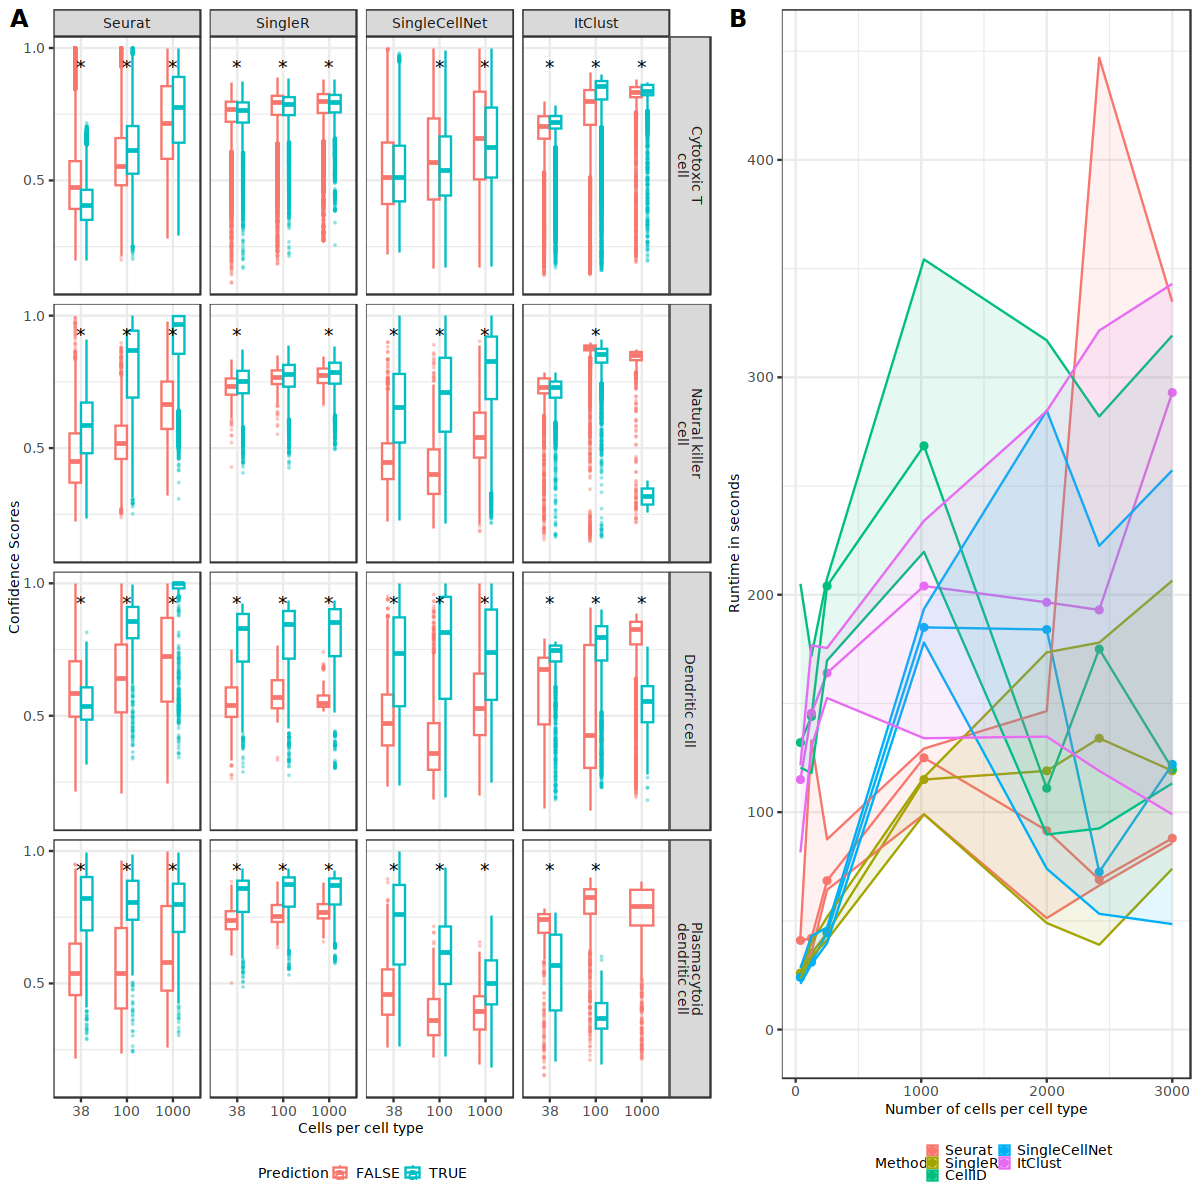

In [9]:

f2bc <- ggpubr::ggarrange(f2c, f6a, nrow=1, ncol=2, labels= c("A", "B"), widths=c(1.5,1))
options(repr.plot.width=10, repr.plot.height=10)
f2bc

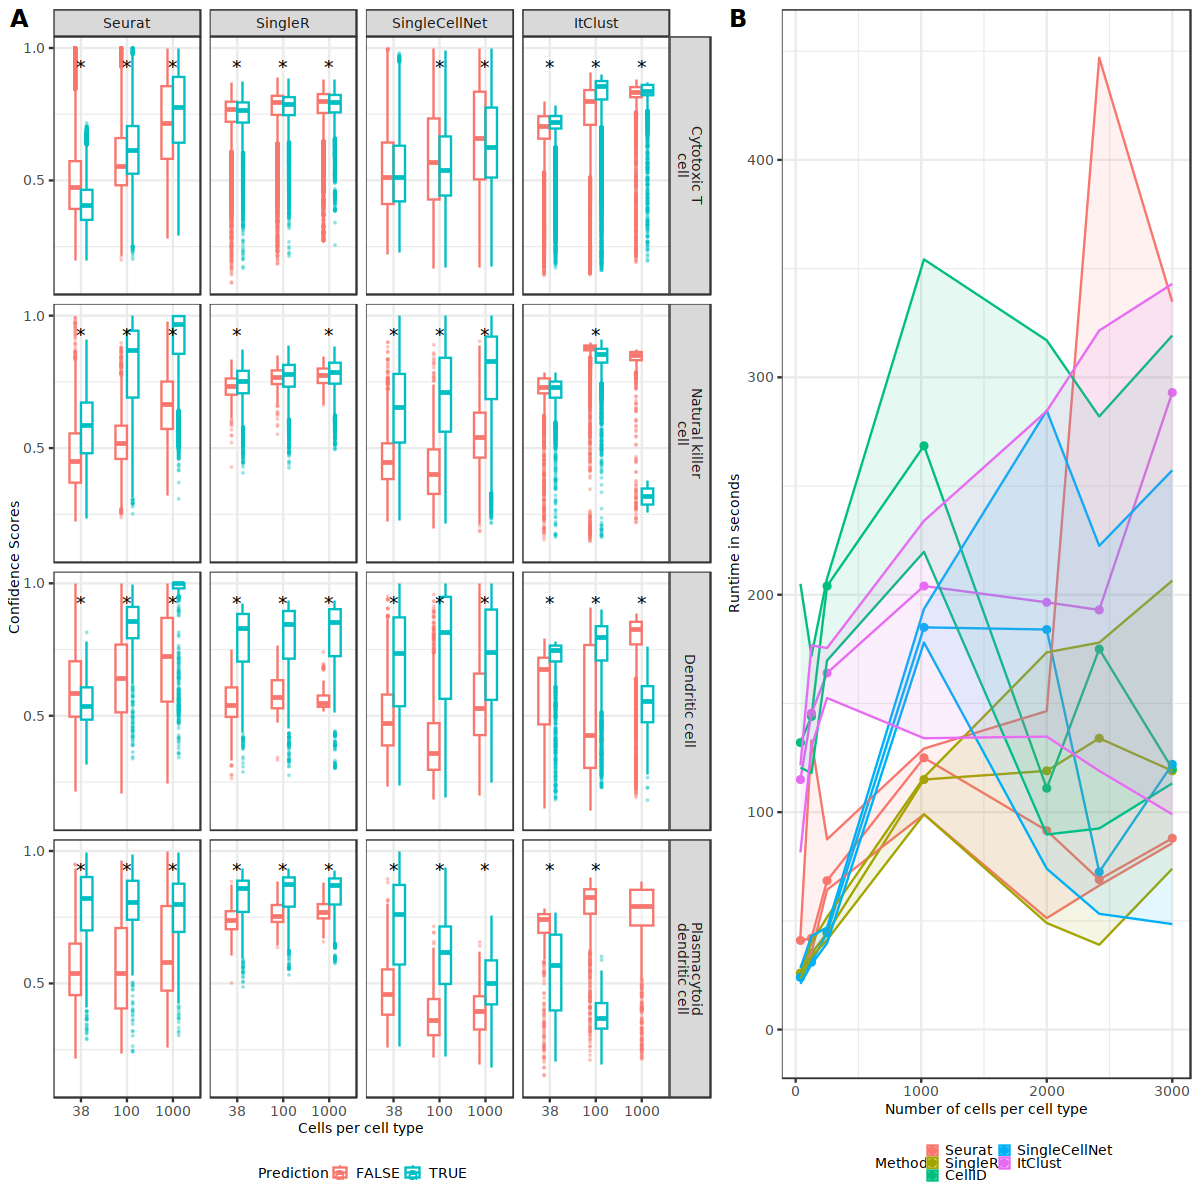

In [10]:

f2bc
ggsave(
  "../Results/Figures/F6_ConfidenceScores.jpg",
  plot = f2bc,
  device="jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 130,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


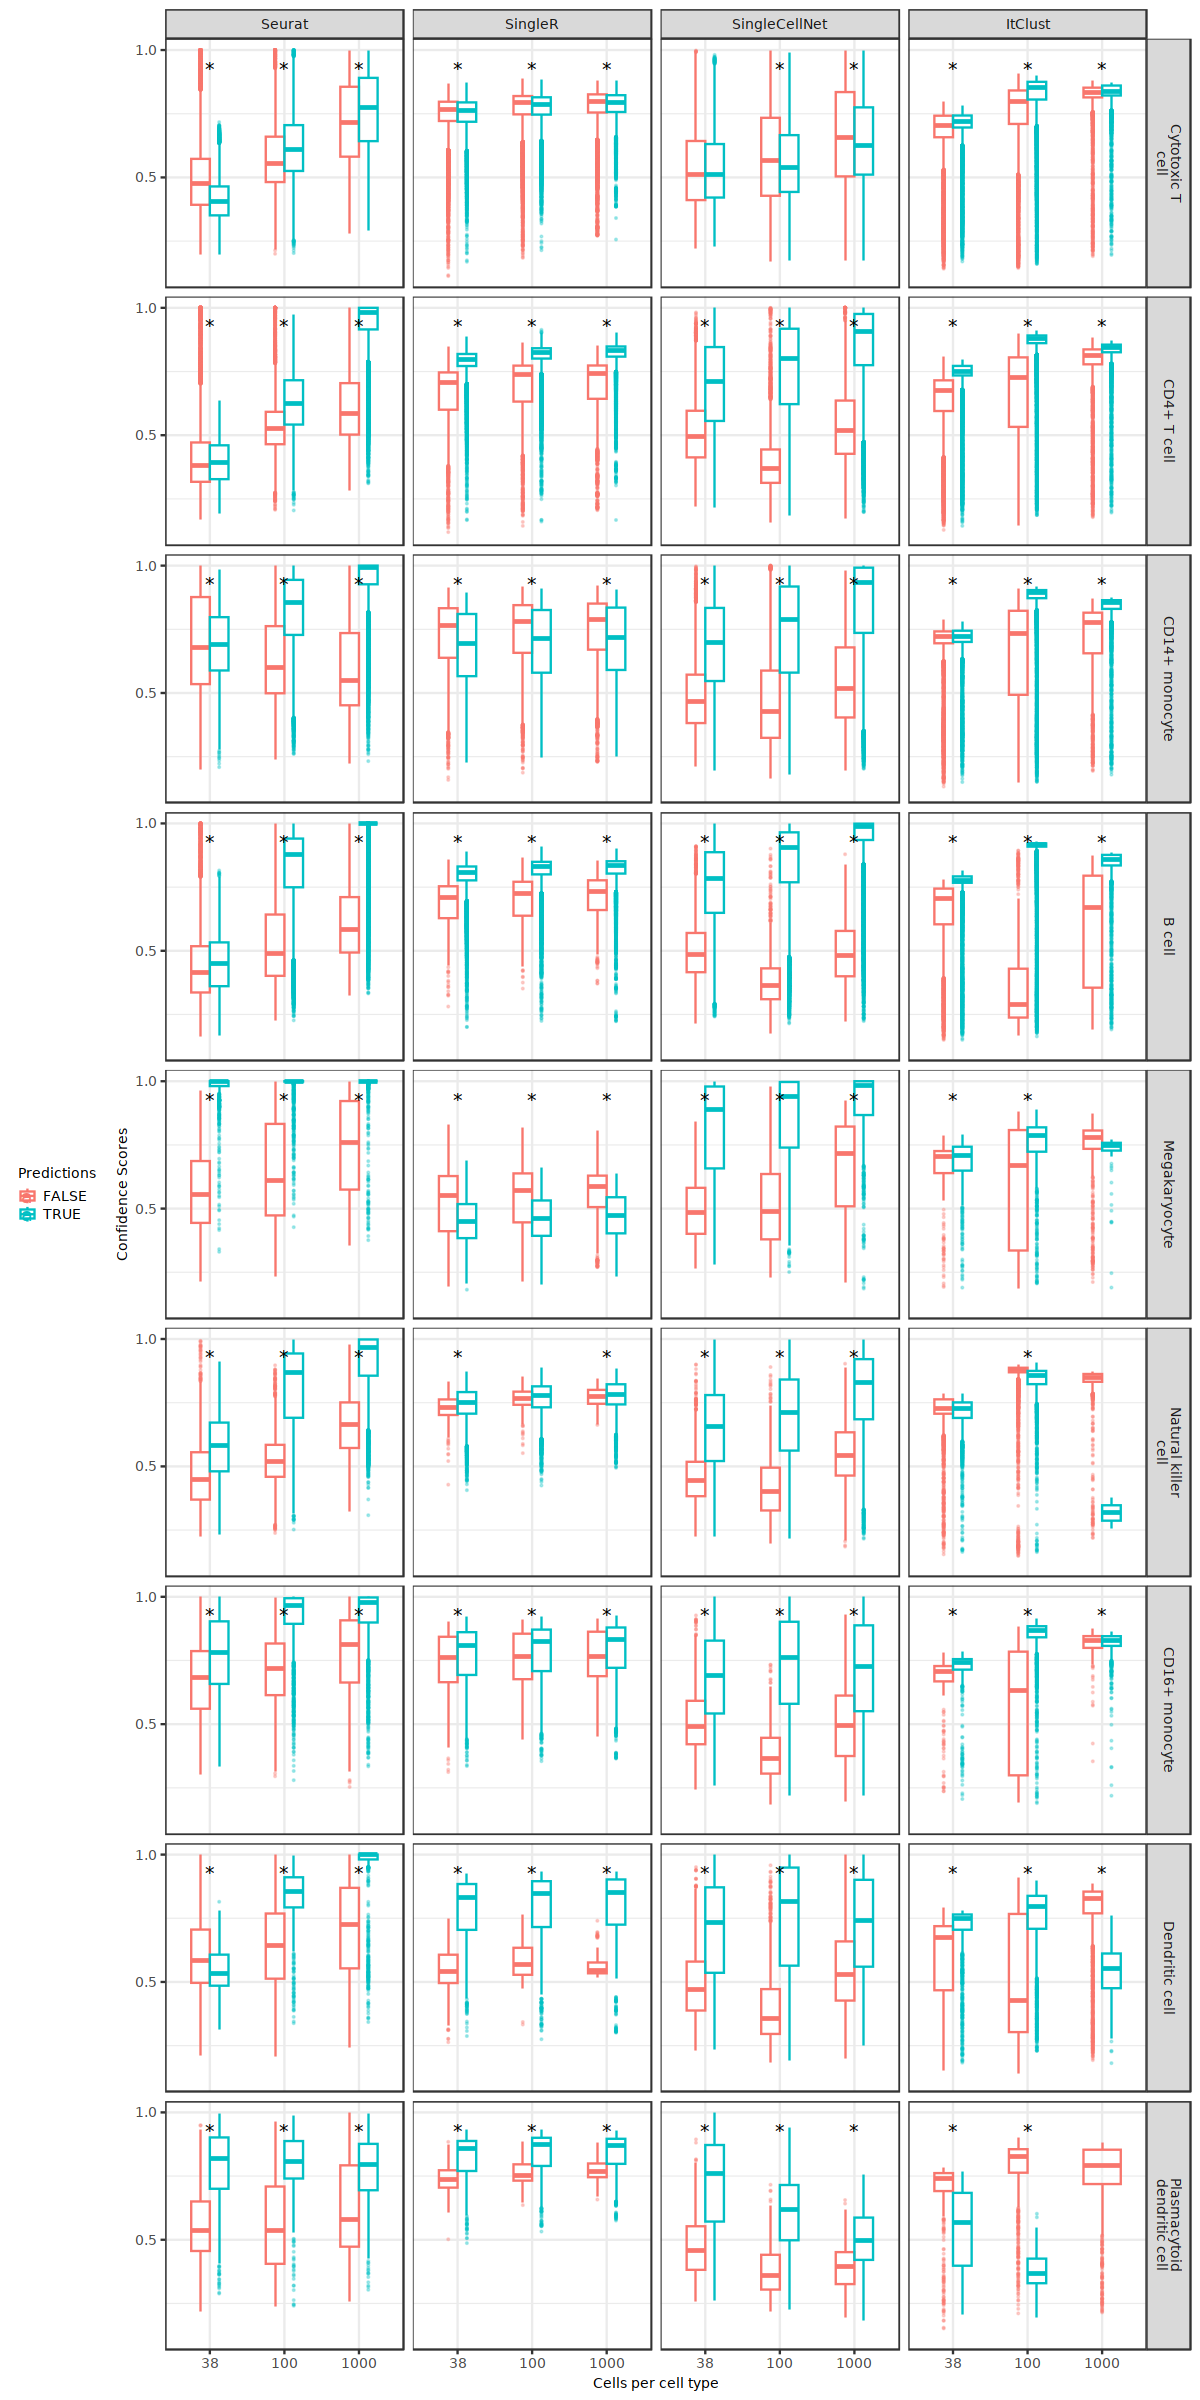

In [6]:
s2 <- plot_confidence_scores(confidence_scores) 
options(repr.plot.width=10, repr.plot.height=20)

s2

ggsave(
  "../Results/Figures/s2_ConfidenceScores.jpg",
  plot = s2,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 200,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
) 


#jpeg(file="../Results/Figures/s2_ConfidenceScores.jpeg",
#width=180, height=100, units="mm",res=300)


#s2
#dev.off()

